### Домашнее задание к лекции «Логистическая регрессия и дискриминантный анализ»  
- Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)  
- Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety  
- Разделите данные на выборку для обучения и тестирования  
- Постройте модель LDA  
- Визуализируйте предсказания для тестовой выборки и центры классов  
- Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width  
- Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [205]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [206]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [207]:
iris = load_iris()

In [208]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [209]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [210]:
# Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
data = data[['sepal length (cm)','sepal width (cm)']]

In [211]:
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [212]:
variety = iris.target
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [273]:
# Разделите данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25, random_state=30)

In [274]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 2)
(112,)
(38, 2)
(38,)


In [275]:
# Постройте модель LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [276]:
lda = LinearDiscriminantAnalysis()

In [277]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [278]:
result = pd.DataFrame([y_test, lda.predict(X_test)])

In [279]:
result.T

,0,1
0,0,0
1,0,0
2,0,0
3,2,1
4,1,1
5,1,1
6,2,2
7,2,2
8,1,2
9,2,2


In [280]:
from sklearn.metrics import accuracy_score

In [281]:
accuracy_score(y_test, lda.predict(X_test))

0.8157894736842105

In [282]:
lda.coef_

array([[-5.95858118,  8.06883002],
       [ 1.96539801, -3.88944255],
       [ 4.27930178, -4.42649375]])

In [283]:
# Визуализируйте предсказания для тестовой выборки и центры классов
lda.means_

array([[5.05263158, 3.46052632],
       [5.97692308, 2.81025641],
       [6.56      , 2.98857143]])

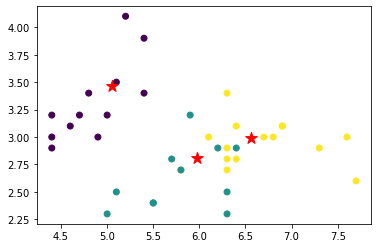

In [284]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.scatter(lda.means_[:,0], lda.means_[:,1], s = 150, c = 'r', marker = '*')
plt.show()

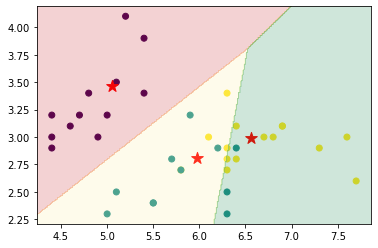

In [285]:
# C разделяющей плоскостью
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.scatter(lda.means_[:,0], lda.means_[:,1], s = 150, c = 'r', marker = '*')

nx, ny = 300, 300
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.2)

По этому графику можно оценить accuracy!  
Видим, что 7 из 38 точек попали в другую группу, то есть для них класс предсказан неправильно.  
accuracy = (38-7)/38 = 0.82  что близко к значению accuracy_score.
Еще можно сделать вывод, что один класс хорошо предсказывается (фиолетовые точки), а желтый и зеленый хуже, все ошибки в этих двух классах. Чтобы улучшить качество, сначала я бы добавила данных (если есть такая возможность), а потом попробовала бы добавить признаки.

#### Кластеризация
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width  
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [286]:
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [287]:
from sklearn.cluster import KMeans

In [288]:
# Подберем оптимальное число кластеров
inertia = []
n_clusters = range(1,20)
for i in n_clusters:
    item_kmeans = KMeans(n_clusters = i)
    clusters_kmeans = item_kmeans.fit_predict(data)
    inertia.append(item_kmeans.inertia_)

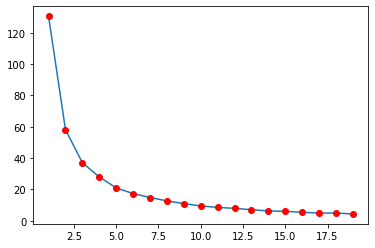

In [290]:
plt.plot(n_clusters, inertia)
plt.plot(n_clusters, inertia, 'ro')

Видно, что наклон кривой меняется после 3-й точки и после 5-й. Если забыть, что в этом датасете три класса, то, глядя на график, я бы выделила пять кластеров. Можно посмотреть на два варианта кластеризации. 

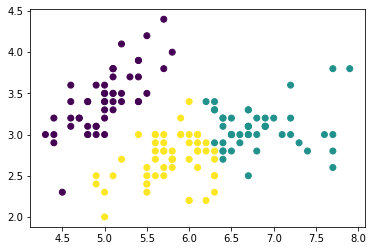

In [291]:
kmeans_3 = KMeans(n_clusters = 3)
clusters = kmeans_3.fit_predict(data)
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=clusters)

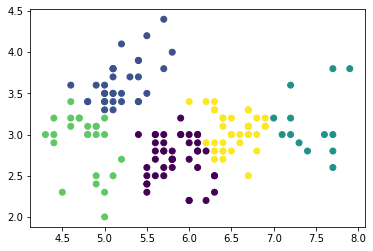

In [292]:
kmeans_5 = KMeans(n_clusters = 5)
clusters = kmeans_5.fit_predict(data)
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=clusters)

Все-таки более оптимальным является разделение на три кластера, так как на соответствующей визуализации желтые точки очевидно отдалены от всех остальных.